# Análisis de anomalías en declaraciones, sistema S1

In [106]:
#importamos las librerias a usar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import json

In [2]:
#extraemos los datos relacionados a los bienes inmuebles, vehiculos declarados y declaraciones de ingresos
vehiculos = pd.read_csv('vehiculos.csv')
declaraciones = pd.read_csv("Declaraciones_correcta.csv")
inmuebles_contado = pd.read_csv("anomaly_bienesInmuebles_contado.csv")
inmuebles_credito = pd.read_csv("anomaly_bienesInmuebles_credito.csv")

## Detección anomalías, declaraciones de vehiculos

In [5]:
values = vehiculos.groupby(['mongo_id']).sum()

C:\Users\edmun\AppData\Local\Temp\ipykernel_2548\1177247825.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  values = vehiculos.groupby(['mongo_id']).sum()


In [7]:
vei_vals = values.sort_values(by='valorAdquisicion.valor', ascending=False)

In [8]:
vei_vals = vei_vals.reset_index()

In [9]:
#acotamos los valores requeridos
vei_vals = vei_vals[['mongo_id','valorAdquisicion.valor']]

In [10]:
vei_vals

,mongo_id,valorAdquisicion.valor
0,6389b8657c4e5f535545e46e,387903000.0
1,638a4025306cb74d0f8cad33,387903000.0
2,638a4025306cb74d0f8ca6d7,337900044.0
3,63899eea451f5e016221a775,334900000.0
4,6389b8657c4e5f53554606b0,297229900.0
...,...,...
15768,638a421bd0ac15c466117e9d,0.0
15769,638a421bd0ac15c466117e9b,0.0
15770,638a421bd0ac15c466117b6d,0.0
15771,638a53b6befe558d3847ceb7,-170.0


<Figure size 1080x792 with 0 Axes>

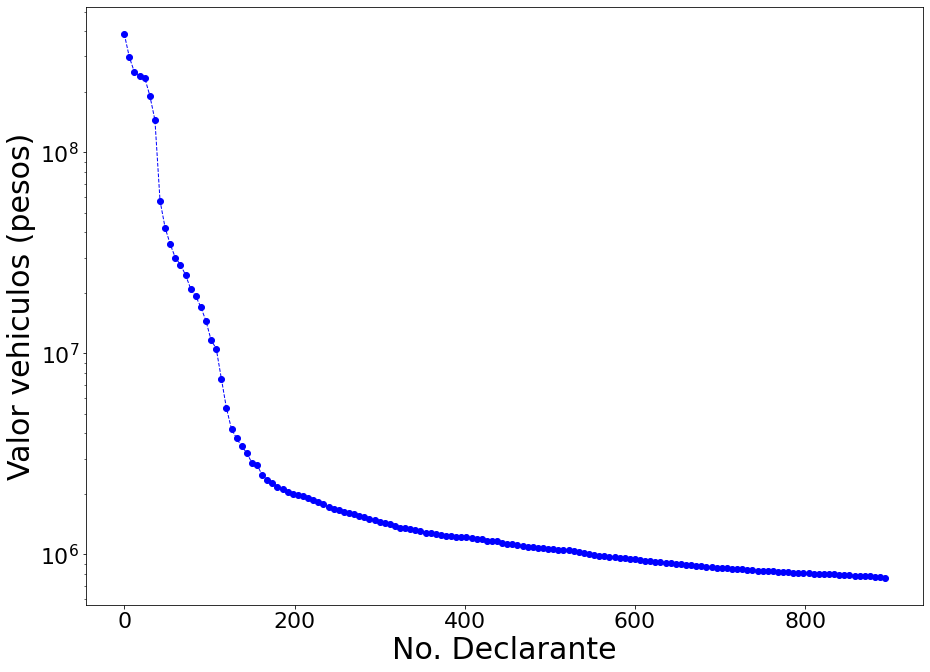

In [12]:
#Mostramos la distribución de de montos declarados para autos
plt.clf() 
plt.rcParams.update({'font.size': 22})

plt.figure()
plt.rcParams['figure.figsize'] = (15,11)

plt.plot(vei_vals["valorAdquisicion.valor"][0:900:6], '--bo',linewidth = 1)

plt.yscale("log")

#plt.ticklabel_format(style= 'plain')

plt.xlabel(r'No. Declarante', size=30)
plt.ylabel(r'Valor vehiculos (pesos)', size=30)
plt.savefig("vehiculos_declarados.png")

In [19]:
vei_vals = vei_vals.reset_index()

In [22]:
Ingresos = declaraciones[['mongo_id','totalIngresosMensualesNetos']]

In [23]:
Ingresos

,mongo_id,totalIngresosMensualesNetos
0,6389b8657c4e5f535546396e,NaN
1,638a4f4aa7c896447a16f236,NaN
2,6389a0add39bc45687aaf8df,NaN
3,6389a0add39bc45687aafd6f,173407.0
4,638a4f4aa7c896447a171634,8200.0
...,...,...
149314,638a431b721eccb6e850c28e,NaN
149315,6389b5b06aaa652831e7de1f,-1.0
149316,6389b5b06aaa652831e7f031,-1.0
149317,638a3f3ae69074f2fd5b62d3,-1.0


In [27]:
Ingresos = declaraciones[['mongo_id','id_servidor','totalIngresosMensualesNetos']]
Ingresos

,mongo_id,id_servidor,totalIngresosMensualesNetos
0,6389b8657c4e5f535546396e,0SCARREBOLLARJAIMES,NaN
1,638a4f4aa7c896447a16f236,AARONABDIELMORALESPALACIOS,NaN
2,6389a0add39bc45687aaf8df,AARONADRIANMORENOLOPEZ,NaN
3,6389a0add39bc45687aafd6f,AARONADRIANTRUJILLOSALCIDO,173407.0
4,638a4f4aa7c896447a171634,AARONAGUILARCASELIN,8200.0
...,...,...,...
149314,638a431b721eccb6e850c28e,ZYANYAGABRIELACASTILLOGARCIA,NaN
149315,6389b5b06aaa652831e7de1f,ZYANYAMARIANAGARCIABALCAZAR,-1.0
149316,6389b5b06aaa652831e7f031,ZYANYANAOMIHERNANDEZFLORES,-1.0
149317,638a3f3ae69074f2fd5b62d3,ZYANYAPAULINAURIBEBAUTISTA,-1.0


In [28]:
#unimos los datos de automóviles e ingresos 
vei_dat = pd.merge(vei_vals,Ingresos,on='mongo_id',how='left')
vei_dat

,index,mongo_id,valorAdquisicion.valor,id_servidor,totalIngresosMensualesNetos
0,0,6389b8657c4e5f535545e46e,387903000.0,NaN,NaN
1,1,638a4025306cb74d0f8cad33,387903000.0,LLANEEVARAMOSFLORES,NaN
2,2,638a4025306cb74d0f8ca6d7,337900044.0,DIANAMAYRETRAMOSFLORES,NaN
3,3,63899eea451f5e016221a775,334900000.0,JOSEPEREZGOMEZ,39900.0
4,4,6389b8657c4e5f53554606b0,297229900.0,NaN,NaN
...,...,...,...,...,...
15768,15768,638a421bd0ac15c466117e9d,0.0,HUGOMANLIOHUERTADIAZDELEON,96500.0
15769,15769,638a421bd0ac15c466117e9b,0.0,NaN,NaN
15770,15770,638a421bd0ac15c466117b6d,0.0,NaN,NaN
15771,15771,638a53b6befe558d3847ceb7,-170.0,NaN,NaN


In [29]:
#ordenamos de menor a mayor para visualizar
vei_dat.sort_values(by='valorAdquisicion.valor', ascending=False)[0:50]

,index,mongo_id,valorAdquisicion.valor,id_servidor,totalIngresosMensualesNetos
0,0,6389b8657c4e5f535545e46e,387903000.0,NaN,NaN
1,1,638a4025306cb74d0f8cad33,387903000.0,LLANEEVARAMOSFLORES,NaN
2,2,638a4025306cb74d0f8ca6d7,337900044.0,DIANAMAYRETRAMOSFLORES,NaN
3,3,63899eea451f5e016221a775,334900000.0,JOSEPEREZGOMEZ,39900.0
4,4,6389b8657c4e5f53554606b0,297229900.0,NaN,NaN
6,6,6389b8657c4e5f53554606b4,297229900.0,NaN,NaN
5,5,6389b8657c4e5f53554606b2,297229900.0,NaN,NaN
7,7,638a4025306cb74d0f8cb59b,297000000.0,ALFREDOMARTINEZARCHUNDIA,NaN
8,8,638a3f3ae69074f2fd5b677b,295990000.0,ALBERTORAMIREZDURAN,NaN
9,9,6389b5b06aaa652831e80abb,289000026.0,NaN,NaN


Sacamos la primera anomalía, si valorAdquisicion pasa cierto umbral (lo vamos a poner en 10 millones)
La segunda anomalía, si valorAdquisicion está debajo de otro umbral (10 mil)

In [33]:
bandera1 = [] #bandera de montos arriba de 1er umbral
bandera2 = [] #bandera de montos debajo de 2do umbral
count = 0
for value in vei_dat['valorAdquisicion.valor']:
    if value>10000000:
        bandera1.append('red')
    elif value<=10000:
        bandera2.append('red')
    else:
        bandera1.append('green')
        bandera2.append('green')


In [34]:
#localizamos datos que cumplen dicha condición de umbral
vei_dat['Bandera1'] = np.where((vei_dat['valorAdquisicion.valor']>=1000000),'red','green')

In [35]:
#localizamos datos que cumplen dicha condición de umbral
vei_dat['Bandera2'] = np.where((vei_dat['valorAdquisicion.valor']<=10000),'red','green')

### Ahora vamos con el dataframe de ingresos

In [37]:
Ingresos['Bandera1'] = np.where((Ingresos['totalIngresosMensualesNetos']).isna(),'red','green')
#math.isnan(Ingresos['totalIngresosMensualesNetos'][1])

C:\Users\edmun\AppData\Local\Temp\ipykernel_2548\2038637295.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ingresos['Bandera1'] = np.where((Ingresos['totalIngresosMensualesNetos']).isna(),'red','green')


In [41]:
inmuebles_contado.rename(columns={'Anomaly_level': 'Bandera4'})

,Unnamed: 0,mongo_id,totalIngresosMensualesNetos,valorAdquisicion.valor,formaPago,Nombre,Apellido 1,Apellido 2,Bandera4
0,125,63899e66ab09906e956c0023,45052.0,1924000.0,CONTADO,CARLOS,NaN,AMADOR,yellow
1,136,63899e66ab09906e956c000f,47295.0,1100000.0,CONTADO,CARLA,JONGUITUD,MENDAROZQUETA,yellow
2,400,63899eea451f5e016220b50d,10330.0,4000000.0,CONTADO,ELEACIN,TORRES,SOLORZANO,yellow
3,594,63899eea451f5e0162216797,40000.0,1026000.0,CONTADO,DILMANICOLASA,BARRIOS,ESCOBAR,yellow
4,650,63899eea451f5e016221a5c7,77711.0,1200000.0,CONTADO,MARIAISABEL,SORDO,MARTINEZ,yellow
...,...,...,...,...,...,...,...,...,...
2054,16831,638a53b6befe558d3847dd23,3508142.0,400000.0,CONTADO,MALUISA,RAMIREZ,ESPARZA,green
2055,16832,638a53b6befe558d3847dcf1,16100.0,75000.0,CONTADO,MAGUADALUPE,GONZALEZ,ALVAREZ,green
2056,16872,638a53b6befe558d3847e559,20285.0,145350.0,CONTADO,UBALDO,DIAZDELEON,DIAZDELEON,green
2057,16873,638a53b6befe558d3847e559,20285.0,470100.0,CONTADO,UBALDO,DIAZDELEON,DIAZDELEON,green


**Agregamos todos los datos a una sola tabla** y renombramos los encabezados.

In [43]:
inmuebles_contado['sort'] = inmuebles_contado.Anomaly_level.map({'green':1,
                       'yellow':2,
                       'red':3})

In [44]:
inmuebles_contado_u = inmuebles_contado.sort_values('sort').groupby('mongo_id').last().reset_index()

In [45]:
inmuebles_contado_u.rename(columns={'Anomaly_level': 'Bandera4'})

,mongo_id,Unnamed: 0,totalIngresosMensualesNetos,valorAdquisicion.valor,formaPago,Nombre,Apellido 1,Apellido 2,Bandera4,sort
0,63899e66ab09906e956bf669,35,38400.0,8250.0,CONTADO,ROSALVAARIADNA,GUTIERREZ,RAMIREZ,green,1
1,63899e66ab09906e956bfc37,63,71000.0,150000.0,CONTADO,RIGOBERTO,GOMEZ,GUTIERREZ,green,1
2,63899e66ab09906e956c000f,136,47295.0,1100000.0,CONTADO,CARLA,JONGUITUD,MENDAROZQUETA,yellow,2
3,63899e66ab09906e956c0023,125,45052.0,1924000.0,CONTADO,CARLOS,None,AMADOR,yellow,2
4,63899e66ab09906e956c074f,198,42000.0,32070.0,CONTADO,JUANA,MEJIA,CARMONA,green,1
...,...,...,...,...,...,...,...,...,...,...
1341,638a53b6befe558d3847d4c7,16813,13116.0,60000.0,CONTADO,IVANDEJESUS,PEREZ,GONZALEZ,green,1
1342,638a53b6befe558d3847dcf1,16832,16100.0,75000.0,CONTADO,MAGUADALUPE,GONZALEZ,ALVAREZ,green,1
1343,638a53b6befe558d3847dd23,16831,3508142.0,400000.0,CONTADO,MALUISA,RAMIREZ,ESPARZA,green,1
1344,638a53b6befe558d3847e559,16873,20285.0,470100.0,CONTADO,UBALDO,DIAZDELEON,DIAZDELEON,green,1


In [46]:
inmuebles_credito.rename(columns={'Anomaly_level': 'Bandera5'})

,Unnamed: 0,mongo_id,totalIngresosMensualesNetos,valorAdquisicion.valor,formaPago,Nombre,Apellido 1,Apellido 2,Bandera5
0,82,63899e66ab09906e956bfcdb,61298.0,1600000.0,CRÉDITO,ERNESTOALONSO,RODRIGUEZ,HURTADO,yellow
1,154,63899e66ab09906e956c033b,18000.0,1092000.0,CRÉDITO,FRANCOADOLFO,CASTRO,ALVAREZ,yellow
2,170,63899e66ab09906e956c047d,18000.0,1350000.0,CRÉDITO,IRISMINERVA,ENCINAS,VERDUGO,yellow
3,651,63899eea451f5e016221a5c7,77711.0,2150000.0,CRÉDITO,MARIAISABEL,SORDO,MARTINEZ,yellow
4,763,63899eea451f5e016221a60d,84213.0,2319000.0,CRÉDITO,DAMASOMIRIAN,GARCIA,LOPEZ,yellow
...,...,...,...,...,...,...,...,...,...
1795,16855,638a53b6befe558d3847e177,19000.0,691000.0,CRÉDITO,ORLANDOULISES,HERNANDEZ,SALAS,green
1796,16866,638a53b6befe558d3847e1a3,18493.0,191703.0,CRÉDITO,OSCARMARTIN,LOPEZ,DELOSSANTOS,green
1797,16867,638a53b6befe558d3847e1a3,18493.0,874000.0,CRÉDITO,OSCARMARTIN,LOPEZ,DELOSSANTOS,green
1798,16868,638a53b6befe558d3847e377,18400.0,433900.0,CRÉDITO,ROGELIO,RIVERA,MORALES,green


In [47]:
inmuebles_credito['sort'] = inmuebles_credito.Anomaly_level.map({'green':1,
                       'yellow':2,
                       'red':3})

In [48]:
inmuebles_credito

,Unnamed: 0,mongo_id,totalIngresosMensualesNetos,valorAdquisicion.valor,formaPago,Nombre,Apellido 1,Apellido 2,Anomaly_level,sort
0,82,63899e66ab09906e956bfcdb,61298.0,1600000.0,CRÉDITO,ERNESTOALONSO,RODRIGUEZ,HURTADO,yellow,2
1,154,63899e66ab09906e956c033b,18000.0,1092000.0,CRÉDITO,FRANCOADOLFO,CASTRO,ALVAREZ,yellow,2
2,170,63899e66ab09906e956c047d,18000.0,1350000.0,CRÉDITO,IRISMINERVA,ENCINAS,VERDUGO,yellow,2
3,651,63899eea451f5e016221a5c7,77711.0,2150000.0,CRÉDITO,MARIAISABEL,SORDO,MARTINEZ,yellow,2
4,763,63899eea451f5e016221a60d,84213.0,2319000.0,CRÉDITO,DAMASOMIRIAN,GARCIA,LOPEZ,yellow,2
...,...,...,...,...,...,...,...,...,...,...
1795,16855,638a53b6befe558d3847e177,19000.0,691000.0,CRÉDITO,ORLANDOULISES,HERNANDEZ,SALAS,green,1
1796,16866,638a53b6befe558d3847e1a3,18493.0,191703.0,CRÉDITO,OSCARMARTIN,LOPEZ,DELOSSANTOS,green,1
1797,16867,638a53b6befe558d3847e1a3,18493.0,874000.0,CRÉDITO,OSCARMARTIN,LOPEZ,DELOSSANTOS,green,1
1798,16868,638a53b6befe558d3847e377,18400.0,433900.0,CRÉDITO,ROGELIO,RIVERA,MORALES,green,1


In [49]:
inmuebles_credito_u = inmuebles_credito.sort_values('sort').groupby('mongo_id').last().reset_index()

In [50]:
inmuebles_credito_u.rename(columns={'Anomaly_level': 'Bandera5'})

,mongo_id,Unnamed: 0,totalIngresosMensualesNetos,valorAdquisicion.valor,formaPago,Nombre,Apellido 1,Apellido 2,Bandera5,sort
0,63899e66ab09906e956be64f,3,17308.0,28898.0,CRÉDITO,DULCESARAHI,MARTINEZ,MOLINA,green,1
1,63899e66ab09906e956bed9b,16,53668.0,45396.0,CRÉDITO,IVAN,BAUTISTA,SAENS,green,1
2,63899e66ab09906e956bee6b,17,89706.0,150000.0,CRÉDITO,JESUSONESIMO,PORTILLO,ANGULO,green,1
3,63899e66ab09906e956beedf,22,29500.0,436000.0,CRÉDITO,JORGEANTONIO,GUERRERO,SICAIROS,green,1
4,63899e66ab09906e956bf229,29,84587.0,18000.0,CRÉDITO,MATERESA,RUIZ,SOTO,green,1
...,...,...,...,...,...,...,...,...,...,...
1465,638a53b6befe558d3847de45,16843,18500.0,850000.0,CRÉDITO,MARIADELSOCORRO,MELENDEZ,MAGALLANES,green,1
1466,638a53b6befe558d3847e177,16855,19000.0,691000.0,CRÉDITO,ORLANDOULISES,HERNANDEZ,SALAS,green,1
1467,638a53b6befe558d3847e1a3,16866,18493.0,191703.0,CRÉDITO,OSCARMARTIN,LOPEZ,DELOSSANTOS,green,1
1468,638a53b6befe558d3847e377,16868,18400.0,433900.0,CRÉDITO,ROGELIO,RIVERA,MORALES,green,1


In [54]:
vei_dat.rename(columns={'valorAdquisicion.valor': 'Valor_auto'},inplace=True)
inmuebles_credito_u.rename(columns={'valorAdquisicion.valor': 'Valor_credito'},inplace=True)
inmuebles_contado_u.rename(columns={'valorAdquisicion.valor': 'Valor_contado'},inplace=True)

In [55]:
inmuebles_credito_u.rename(columns={'Anomaly_level': 'Bandera3'},inplace=True)
inmuebles_contado_u.rename(columns={'Anomaly_level': 'Bandera3'},inplace=True)

In [56]:
Ingresos.rename(columns={'Bandera1': 'Bandera3'},inplace=True)

C:\Users\edmun\AppData\Local\Temp\ipykernel_2548\173816072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ingresos.rename(columns={'Bandera1': 'Bandera3'},inplace=True)


In [57]:
inmuebles_credito_u

,mongo_id,Unnamed: 0,totalIngresosMensualesNetos,Valor_credito,formaPago,Nombre,Apellido 1,Apellido 2,Bandera3,sort
0,63899e66ab09906e956be64f,3,17308.0,28898.0,CRÉDITO,DULCESARAHI,MARTINEZ,MOLINA,green,1
1,63899e66ab09906e956bed9b,16,53668.0,45396.0,CRÉDITO,IVAN,BAUTISTA,SAENS,green,1
2,63899e66ab09906e956bee6b,17,89706.0,150000.0,CRÉDITO,JESUSONESIMO,PORTILLO,ANGULO,green,1
3,63899e66ab09906e956beedf,22,29500.0,436000.0,CRÉDITO,JORGEANTONIO,GUERRERO,SICAIROS,green,1
4,63899e66ab09906e956bf229,29,84587.0,18000.0,CRÉDITO,MATERESA,RUIZ,SOTO,green,1
...,...,...,...,...,...,...,...,...,...,...
1465,638a53b6befe558d3847de45,16843,18500.0,850000.0,CRÉDITO,MARIADELSOCORRO,MELENDEZ,MAGALLANES,green,1
1466,638a53b6befe558d3847e177,16855,19000.0,691000.0,CRÉDITO,ORLANDOULISES,HERNANDEZ,SALAS,green,1
1467,638a53b6befe558d3847e1a3,16866,18493.0,191703.0,CRÉDITO,OSCARMARTIN,LOPEZ,DELOSSANTOS,green,1
1468,638a53b6befe558d3847e377,16868,18400.0,433900.0,CRÉDITO,ROGELIO,RIVERA,MORALES,green,1


In [58]:
flags_1 = pd.merge(Ingresos,vei_dat[['mongo_id','Valor_auto','Bandera1','Bandera2']],on='mongo_id',how='left')

In [59]:
inmuebles_credito_u.rename(columns={'Bandera3': 'Bandera4'},inplace=True)
inmuebles_contado_u.rename(columns={'Bandera3': 'Bandera4'},inplace=True)

In [60]:
inmuebles_contado_u.rename(columns={'Bandera4': 'Bandera5'},inplace=True)

In [61]:
inmuebles_credito_u

,mongo_id,Unnamed: 0,totalIngresosMensualesNetos,Valor_credito,formaPago,Nombre,Apellido 1,Apellido 2,Bandera4,sort
0,63899e66ab09906e956be64f,3,17308.0,28898.0,CRÉDITO,DULCESARAHI,MARTINEZ,MOLINA,green,1
1,63899e66ab09906e956bed9b,16,53668.0,45396.0,CRÉDITO,IVAN,BAUTISTA,SAENS,green,1
2,63899e66ab09906e956bee6b,17,89706.0,150000.0,CRÉDITO,JESUSONESIMO,PORTILLO,ANGULO,green,1
3,63899e66ab09906e956beedf,22,29500.0,436000.0,CRÉDITO,JORGEANTONIO,GUERRERO,SICAIROS,green,1
4,63899e66ab09906e956bf229,29,84587.0,18000.0,CRÉDITO,MATERESA,RUIZ,SOTO,green,1
...,...,...,...,...,...,...,...,...,...,...
1465,638a53b6befe558d3847de45,16843,18500.0,850000.0,CRÉDITO,MARIADELSOCORRO,MELENDEZ,MAGALLANES,green,1
1466,638a53b6befe558d3847e177,16855,19000.0,691000.0,CRÉDITO,ORLANDOULISES,HERNANDEZ,SALAS,green,1
1467,638a53b6befe558d3847e1a3,16866,18493.0,191703.0,CRÉDITO,OSCARMARTIN,LOPEZ,DELOSSANTOS,green,1
1468,638a53b6befe558d3847e377,16868,18400.0,433900.0,CRÉDITO,ROGELIO,RIVERA,MORALES,green,1


In [62]:
flags_2 = pd.merge(flags_1,inmuebles_credito_u[['mongo_id','Valor_credito','Bandera4']],on='mongo_id',how='left')

In [64]:
inmuebles_contado_u

,mongo_id,Unnamed: 0,totalIngresosMensualesNetos,Valor_contado,formaPago,Nombre,Apellido 1,Apellido 2,Bandera5,sort
0,63899e66ab09906e956bf669,35,38400.0,8250.0,CONTADO,ROSALVAARIADNA,GUTIERREZ,RAMIREZ,green,1
1,63899e66ab09906e956bfc37,63,71000.0,150000.0,CONTADO,RIGOBERTO,GOMEZ,GUTIERREZ,green,1
2,63899e66ab09906e956c000f,136,47295.0,1100000.0,CONTADO,CARLA,JONGUITUD,MENDAROZQUETA,yellow,2
3,63899e66ab09906e956c0023,125,45052.0,1924000.0,CONTADO,CARLOS,None,AMADOR,yellow,2
4,63899e66ab09906e956c074f,198,42000.0,32070.0,CONTADO,JUANA,MEJIA,CARMONA,green,1
...,...,...,...,...,...,...,...,...,...,...
1341,638a53b6befe558d3847d4c7,16813,13116.0,60000.0,CONTADO,IVANDEJESUS,PEREZ,GONZALEZ,green,1
1342,638a53b6befe558d3847dcf1,16832,16100.0,75000.0,CONTADO,MAGUADALUPE,GONZALEZ,ALVAREZ,green,1
1343,638a53b6befe558d3847dd23,16831,3508142.0,400000.0,CONTADO,MALUISA,RAMIREZ,ESPARZA,green,1
1344,638a53b6befe558d3847e559,16873,20285.0,470100.0,CONTADO,UBALDO,DIAZDELEON,DIAZDELEON,green,1


In [65]:
flags_3 = pd.merge(flags_2,inmuebles_contado_u[['mongo_id','Valor_contado','Bandera5']],on='mongo_id',how='left')

In [66]:
flags_3

,mongo_id,id_servidor,totalIngresosMensualesNetos,Bandera3,Valor_auto,Bandera1,Bandera2,Valor_credito,Bandera4,Valor_contado,Bandera5
0,6389b8657c4e5f535546396e,0SCARREBOLLARJAIMES,NaN,red,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,638a4f4aa7c896447a16f236,AARONABDIELMORALESPALACIOS,NaN,red,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6389a0add39bc45687aaf8df,AARONADRIANMORENOLOPEZ,NaN,red,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6389a0add39bc45687aafd6f,AARONADRIANTRUJILLOSALCIDO,173407.0,green,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,638a4f4aa7c896447a171634,AARONAGUILARCASELIN,8200.0,green,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
149314,638a431b721eccb6e850c28e,ZYANYAGABRIELACASTILLOGARCIA,NaN,red,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149315,6389b5b06aaa652831e7de1f,ZYANYAMARIANAGARCIABALCAZAR,-1.0,green,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149316,6389b5b06aaa652831e7f031,ZYANYANAOMIHERNANDEZFLORES,-1.0,green,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149317,638a3f3ae69074f2fd5b62d3,ZYANYAPAULINAURIBEBAUTISTA,-1.0,green,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
flags_3.Bandera5.value_counts()

green     883
yellow     78
red        11
Name: Bandera5, dtype: int64

In [78]:
flags_3.Bandera2 = flags_3.Bandera2.fillna('white')

In [79]:
flags_2

,mongo_id,id_servidor,totalIngresosMensualesNetos,Bandera3,Valor_auto,Bandera1,Bandera2,Valor_credito,Bandera4
0,6389b8657c4e5f535546396e,0SCARREBOLLARJAIMES,NaN,red,NaN,NaN,NaN,NaN,NaN
1,638a4f4aa7c896447a16f236,AARONABDIELMORALESPALACIOS,NaN,red,NaN,NaN,NaN,NaN,NaN
2,6389a0add39bc45687aaf8df,AARONADRIANMORENOLOPEZ,NaN,red,NaN,NaN,NaN,NaN,NaN
3,6389a0add39bc45687aafd6f,AARONADRIANTRUJILLOSALCIDO,173407.0,green,NaN,NaN,NaN,NaN,NaN
4,638a4f4aa7c896447a171634,AARONAGUILARCASELIN,8200.0,green,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
149314,638a431b721eccb6e850c28e,ZYANYAGABRIELACASTILLOGARCIA,NaN,red,NaN,NaN,NaN,NaN,NaN
149315,6389b5b06aaa652831e7de1f,ZYANYAMARIANAGARCIABALCAZAR,-1.0,green,NaN,NaN,NaN,NaN,NaN
149316,6389b5b06aaa652831e7f031,ZYANYANAOMIHERNANDEZFLORES,-1.0,green,NaN,NaN,NaN,NaN,NaN
149317,638a3f3ae69074f2fd5b62d3,ZYANYAPAULINAURIBEBAUTISTA,-1.0,green,NaN,NaN,NaN,NaN,NaN


In [80]:
flags_3.Bandera1 = flags_3.Bandera1.fillna('white')
flags_3.Bandera4 = flags_3.Bandera4.fillna('white')
flags_3.Bandera5 = flags_3.Bandera5.fillna('white')

In [82]:
flags_3

,mongo_id,id_servidor,totalIngresosMensualesNetos,Bandera3,Valor_auto,Bandera1,Bandera2,Valor_credito,Bandera4,Valor_contado,Bandera5
0,6389b8657c4e5f535546396e,0SCARREBOLLARJAIMES,NaN,red,NaN,white,white,NaN,white,NaN,white
1,638a4f4aa7c896447a16f236,AARONABDIELMORALESPALACIOS,NaN,red,NaN,white,white,NaN,white,NaN,white
2,6389a0add39bc45687aaf8df,AARONADRIANMORENOLOPEZ,NaN,red,NaN,white,white,NaN,white,NaN,white
3,6389a0add39bc45687aafd6f,AARONADRIANTRUJILLOSALCIDO,173407.0,green,NaN,white,white,NaN,white,NaN,white
4,638a4f4aa7c896447a171634,AARONAGUILARCASELIN,8200.0,green,NaN,white,white,NaN,white,NaN,white
...,...,...,...,...,...,...,...,...,...,...,...
149314,638a431b721eccb6e850c28e,ZYANYAGABRIELACASTILLOGARCIA,NaN,red,NaN,white,white,NaN,white,NaN,white
149315,6389b5b06aaa652831e7de1f,ZYANYAMARIANAGARCIABALCAZAR,-1.0,green,NaN,white,white,NaN,white,NaN,white
149316,6389b5b06aaa652831e7f031,ZYANYANAOMIHERNANDEZFLORES,-1.0,green,NaN,white,white,NaN,white,NaN,white
149317,638a3f3ae69074f2fd5b62d3,ZYANYAPAULINAURIBEBAUTISTA,-1.0,green,NaN,white,white,NaN,white,NaN,white


In [83]:
flags_3.rename(columns={'Bandera3': 'Bandera0'},inplace=True)
flags_3.rename(columns={'Bandera2': 'Bandera02'},inplace=True)
flags_3.rename(columns={'Bandera1': 'Bandera01'},inplace=True)

In [84]:
flags_3[flags_3.mongo_id == '6389a0add39bc45687ab147d']

,mongo_id,id_servidor,totalIngresosMensualesNetos,Bandera0,Valor_auto,Bandera01,Bandera02,Valor_credito,Bandera4,Valor_contado,Bandera5
127731,6389a0add39bc45687ab147d,RAULMANRIQUEZMORENO,77996.0,green,615000.0,green,green,NaN,white,NaN,white


In [85]:
flags_3.rename(columns={'Bandera0': 'Bandera1'},inplace=True)
flags_3.rename(columns={'Bandera02': 'Bandera3'},inplace=True)
flags_3.rename(columns={'Bandera01': 'Bandera2'},inplace=True)

In [105]:
flags_3.to_csv("anomalias.csv")

### Exportamos la información  de las anomalías en un archivo *.json*

In [100]:
count = 0
dic_list = []
for Id in flags_3.mongo_id:
    dic = {}
    dic = {'mongo_id': Id, 'id_servidor': flags_3.id_servidor[count],'Bandera1': flags_3.Bandera1[count],
           'Bandera2': flags_3.Bandera2[count],
           'Bandera3': flags_3.Bandera3[count], 'Valor_auto': flags_3.Valor_auto[count],
           'Bandera4': flags_3.Bandera4[count], 'Valor_credito': flags_3.Valor_credito[count],
           'Bandera5': flags_3.Bandera5[count], 'Valor_contado': flags_3.Valor_contado[count]
          }
    '''with open('personas/dictionary'+Id+'.json', 'w') as convert_file:
        convert_file.write(json.dumps(dic))'''
    count += 1
    dic_list.append(dic)


In [103]:
dic_list

[{'mongo_id': '6389b8657c4e5f535546396e',
  'id_servidor': '0SCARREBOLLARJAIMES',
  'Bandera1': 'red',
  'Bandera2': 'white',
  'Bandera3': 'white',
  'Valor_auto': nan,
  'Bandera4': 'white',
  'Valor_credito': nan,
  'Bandera5': 'white',
  'Valor_contado': nan},
 {'mongo_id': '638a4f4aa7c896447a16f236',
  'id_servidor': 'AARONABDIELMORALESPALACIOS',
  'Bandera1': 'red',
  'Bandera2': 'white',
  'Bandera3': 'white',
  'Valor_auto': nan,
  'Bandera4': 'white',
  'Valor_credito': nan,
  'Bandera5': 'white',
  'Valor_contado': nan},
 {'mongo_id': '6389a0add39bc45687aaf8df',
  'id_servidor': 'AARONADRIANMORENOLOPEZ',
  'Bandera1': 'red',
  'Bandera2': 'white',
  'Bandera3': 'white',
  'Valor_auto': nan,
  'Bandera4': 'white',
  'Valor_credito': nan,
  'Bandera5': 'white',
  'Valor_contado': nan},
 {'mongo_id': '6389a0add39bc45687aafd6f',
  'id_servidor': 'AARONADRIANTRUJILLOSALCIDO',
  'Bandera1': 'green',
  'Bandera2': 'white',
  'Bandera3': 'white',
  'Valor_auto': nan,
  'Bandera4': 'w

In [96]:
import glob
list_instituciones = []
for _ in glob.glob('./personas/*.json'):
    with open(_, encoding="utf-8") as file:
        data=json.load(file)
        list_instituciones.append(data)

In [104]:
with open("mydata.json", "w") as final:
    json.dump(dic_list, final)

In [102]:
with open('./anomalias.json', 'w') as f:
    json.dump(dic_list, f, indent=4)

SyntaxError: invalid non-printable character U+00A0 (2403190218.py, line 2)

In [209]:
declaraciones2 = pd.read_csv("s1_declaraciones.csv")

C:\Users\edmun\AppData\Local\Temp\ipykernel_12968\2285010986.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  declaraciones2 = pd.read_csv("s1_declaraciones.csv")


In [210]:
declaraciones2[declaraciones2.mongo_id == '6389a0add39bc45687ab147d']

,Unnamed: 0,Nombre,Apellido 1,Apellido 2,mongo_id,nivel_escolar,status_escolaridad,nivelEmpleoCargoComision,remuneracionMensualCargoPublico,remuneracionMensualCargoPublicoMoneda,otrosIngresosMensualesTotal,otrosIngresosMensualesTotalMoneda,totalIngresosMensualesNetos,totalIngresosMensualesNetosMoneda,BienesInmubeles,ingresoNetoAnualDeclarante,id_servidor
63126,63126,RAUL,MANRIQUEZ,MORENO,6389a0add39bc45687ab147d,DOCTORADO,FINALIZADO,DIRECCIÓN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,RAULMANRIQUEZMORENO
